# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display # Função para melhorar a exibição de DataFrames no Colab/Jupyter

In [ ]:
#ETAPA -COLETA
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')
df.head(-5)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,7641-TQFHN,Male,0,No,Yes,39,Yes,Fiber optic,No,Yes,Yes,Two year,Mailed check,100.55,3895.35,No
2491,1552-TKMXS,Female,0,Yes,No,42,Yes,No,No internet service,No internet service,No internet service,Month-to-month,Credit card (automatic),20.35,869.90,No
2492,9206-GVPEQ,Male,0,Yes,No,13,No,DSL,Yes,Yes,Yes,Month-to-month,Electronic check,54.45,706.85,Yes
2493,8622-ZLFKO,Female,0,Yes,No,6,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,90.75,512.25,No


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [ ]:
#ETAPA DE VALIDAÇÃO - Informações iniciais tipologia do DataFrame - Classes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

In [ ]:
#ETAPA DE VALIDAÇÃO  - Verificar Nome das Colunas
print(df.columns.tolist())

['customerID', 'Genero', 'Idoso', 'Casado', 'Dependents', 'Tempo_como_Cliente', 'PhoneService', 'Servico_Internet', 'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato', 'PaymentMethod', 'Pagamento_Mensal', 'Total_Pago', 'Churn']


In [ ]:
#ETAPA DE VALIDAÇÃO - Informações iniciais do DataFrame - Visualização DataFrame (Primeiras e últimas 5 linhas)

df.head(-5)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,7641-TQFHN,Male,0,No,Yes,39,Yes,Fiber optic,No,Yes,Yes,Two year,Mailed check,100.55,3895.35,No
2491,1552-TKMXS,Female,0,Yes,No,42,Yes,No,No internet service,No internet service,No internet service,Month-to-month,Credit card (automatic),20.35,869.90,No
2492,9206-GVPEQ,Male,0,Yes,No,13,No,DSL,Yes,Yes,Yes,Month-to-month,Electronic check,54.45,706.85,Yes
2493,8622-ZLFKO,Female,0,Yes,No,6,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,90.75,512.25,No


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [ ]:
#ETAPA DE VALIDAÇÃO - Verificar Zero e NAN

#Número total de linhas do DataFrame
total_rows = len(df)
print(total_rows)

2500


In [ ]:
#ETAPA DE VALIDAÇÃO - Verificar Zero e NAN

#Verificar valores ausentes (NaN)
check_values = df.isna().sum()
values_percent = (check_values / total_rows * 100).round(2)

print("\nValores ausentes (quantidade e %):\n")
display(pd.DataFrame({'Total': check_values, '%': values_percent}))


Valores ausentes (quantidade e %):



,Total,%
customerID,0,0.00
Genero,12,0.48
Idoso,0,0.00
Casado,0,0.00
Dependents,0,0.00
Tempo_como_Cliente,0,0.00
PhoneService,1482,59.28
Servico_Internet,0,0.00
Servico_Seguranca,0,0.00
Suporte_Tecnico,0,0.00


In [ ]:
#ETAPA DE VALIDAÇÃO - Valores zero nas colunas numéricas

numeric_cols = df.select_dtypes(include=['number']).columns
zero_counts = (df[numeric_cols] == 0).sum()
zero_percent = (zero_counts / total_rows * 100).round(2)

#SAÍDA
print(numeric_cols)

Index(['Idoso', 'Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago'], dtype='object')


In [ ]:
#SAÍDA
print(zero_counts)

Idoso                 2098
Tempo_como_Cliente       5
Pagamento_Mensal         0
Total_Pago               0
dtype: int64


In [ ]:
#SAÍDA
print(zero_percent)

Idoso                 83.92
Tempo_como_Cliente     0.20
Pagamento_Mensal       0.00
Total_Pago             0.00
dtype: float64


In [ ]:
#SAÍDA - Valores Zero
print("\n Valores Zero:\n ")
print(pd.DataFrame({'Total': zero_counts, '%': zero_percent}))


 Valores Zero:
 
                    Total      %
Idoso                2098  83.92
Tempo_como_Cliente      5   0.20
Pagamento_Mensal        0   0.00
Total_Pago              0   0.00


In [ ]:
#SAÍDA - Isolamento 'Tempo _omo_ Cliente'
print(f"\n Registros com Tempo_como_Cliente == 0: {len(clientes_tempo_zero)}\n ")

#Exibir somente colunas relevantes com uso da biblioteca 'display'
colunas_relevantes = ['customerID', 'Tempo_como_Cliente', 'Genero', 'Pagamento_Mensal', 'Total_Pago', 'Churn']
display(clientes_tempo_zero[colunas_relevantes].reset_index(drop=True))


 Registros com Tempo_como_Cliente == 0: 5
 


,customerID,Tempo_como_Cliente,Genero,Pagamento_Mensal,Total_Pago,Churn
0,4472-LVYGI,0,Female,52.55,52.55,No
1,3115-CZMZD,0,Male,20.25,40.50,No
2,5709-LVOEQ,0,Female,80.85,80.85,No
3,4367-NUYAO,0,Male,25.75,25.75,No
4,1371-DWPAZ,0,Female,56.05,56.05,No


In [ ]:
#ETAPA DE VALIDAÇÃO - Verificar Zero e NAN

#Verificar valores (0) zero nas colunas numéricas (exceto 'Idoso', onde zero é válido)
numeric_cols = df.select_dtypes(include=['number']).columns
zero_counts = (df[numeric_cols] == 0).sum()

#Calcular percentuais
values_percent = (check_values / total_rows * 100).round(2)
zero_percent = (zero_counts / total_rows * 100).round(2)

#SAÍDA
print("\n Valores ausentes (quantidade e %):\n ")
display(pd.DataFrame({'Total': check_values, '%': values_percent}))


 Valores ausentes (quantidade e %):
 


,Total,%
customerID,0,0.00
Genero,12,0.48
Idoso,0,0.00
Casado,0,0.00
Dependents,0,0.00
Tempo_como_Cliente,0,0.00
PhoneService,1482,59.28
Servico_Internet,0,0.00
Servico_Seguranca,0,0.00
Suporte_Tecnico,0,0.00


#B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

#Resposta
Podem prejudicar as análises e gerações de gráficos com os valores corretos.

In [ ]:
#VERIFICAÇÃO - SAÍDA
print("\n Valores zero nas colunas numéricas (quantidade e %):\n ")
display(pd.DataFrame({'Total': zero_counts, '%': zero_percent}))


 Valores zero nas colunas numéricas (quantidade e %):
 


,Total,%
Idoso,2098,83.92
Tempo_como_Cliente,5,0.20
Pagamento_Mensal,0,0.00
Total_Pago,0,0.00


In [ ]:
#ETAPA DE VALIDAÇÃO - Excluir Linhas: Zero e NAN (exceto coluna 'Idoso')

#Remover linhas com qualquer valor ausente (NaN):
df_clean = df.dropna()

#Remover linhas com valor (0) zero de colunas identificadas:
colunas_com_zero_invalido = ['Tempo_como_Cliente']
for col in colunas_com_zero_invalido:
    df_clean = df_clean[df_clean[col] != 0]

# SAÍDA
print(f"\n Linhas restantes após isolamento : \n {len(df_clean)} \n ")
display(df_clean.head())



 Linhas restantes após isolamento : 
 860 
 


,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1643,9469-WEJBT,Male,0,Yes,No,37,Yes,Fiber optic,No,Yes,No,Month-to-month,Electronic check,90.35,3419.30,No
1644,3331-HQDTW,Female,0,No,No,34,Yes,Fiber optic,Yes,No,Yes,Month-to-month,Mailed check,109.80,3587.25,Yes


#C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

#Resposta:

1- Apliquei a **mediana** porque a distribuição estava assimétrica (havia valores muito altos e/ou baixos).

2- Apliquei a **moda** porque é uma variável categórica e esse era o valor mais comum.

3- Apliquei a **média** porque a distribuição era equilibrada e sem outliers.

In [ ]:
#ISOLAMENTO - Identificar colunas com valores faltantes

print("\nColunas com valores faltantes:")
print(df.isna().sum()[df.isna().sum() > 0])


Colunas com valores faltantes:
Genero                12
PhoneService        1482
Pagamento_Mensal     325
Churn                  5
dtype: int64


In [ ]:
#ISOLAMENTO - Isolar as colunas com valores faltantes

faltantes_colunas = df.columns[df.isna().any()]
print("\n Colunas identificadas:", faltantes_colunas.tolist())


 Colunas identificadas: ['Genero', 'PhoneService', 'Pagamento_Mensal', 'Churn']


In [ ]:
#ISOLAMENTO - Verificar 'class' colunas com valores faltantes
print("\n Tipos das colunas faltantes:")
print(df[faltantes_colunas].dtypes)


 Tipos das colunas faltantes:
Genero               object
PhoneService         object
Pagamento_Mensal    float64
Churn                object
dtype: object


In [ ]:
#ESTATÍSTICA - Média, Moda e Mediana

#Categóricas - moda
moda_genero = df['Genero'].mode()[0]
moda_phoneservice = df['PhoneService'].mode()[0]
moda_churn = df['Churn'].mode()[0]

# Numérica - média e mediana
media_pagamento = df['Pagamento_Mensal'].mean()
mediana_pagamento = df['Pagamento_Mensal'].median()

# Exibir decisão
print("\nEstatísticas para análise:")
print(f"Moda - Genero: {moda_genero}")
print(f"Moda - PhoneService: {moda_phoneservice}")
print(f"Moda - Churn: {moda_churn}")
print(f"Pagamento_Mensal - Média: R$ {media_pagamento:.2f} | Mediana: R$ {mediana_pagamento:.2f}")




Estatísticas para análise:
Moda - Genero: Male
Moda - PhoneService: Yes
Moda - Churn: No
Pagamento_Mensal - Média: R$ 65.61 | Mediana: R$ 71.45


In [ ]:
#Substituir os valores ausentes

df['Genero'] = df['Genero'].fillna(moda_genero)
df['PhoneService'] = df['PhoneService'].fillna(moda_phoneservice)
df['Churn'] = df['Churn'].fillna(moda_churn)
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana_pagamento)

print(df.isna().sum())

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64


In [ ]:
#ESTATÍSTICA

#Ver moda das variáveis categóricas
moda_genero = df['Genero'].mode()[0]
moda_phoneservice = df['PhoneService'].mode()[0]
moda_churn = df['Churn'].mode()[0]

#Ver média e mediana da variável numérica
media_pagamento = df['Pagamento_Mensal'].mean()
mediana_pagamento = df['Pagamento_Mensal'].median()

print(f"Moda Genero: {moda_genero}")
print(f"Moda PhoneService: {moda_phoneservice}")
print(f"Moda Churn: {moda_churn}")
print(f"Média Pagamento_Mensal: {media_pagamento:.2f}")
print(f"Mediana Pagamento_Mensal: {mediana_pagamento:.2f}")

Moda Genero: Male
Moda PhoneService: Yes
Moda Churn: No
Média Pagamento_Mensal: 66.37
Mediana Pagamento_Mensal: 71.45


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [ ]:
#DEPURAÇÃO - Corrigir valores inconsistentes nos dados categóricos

# Corrigir 'Genero': padronizar F/M/f para Female/Male
df['Genero'] = df['Genero'].replace({
    'F': 'Female',
    'f': 'Female',
    'M': 'Male'
})

# Corrigir 'Servico_Internet': padronizar 'dsl' para 'DSL'
df['Servico_Internet'] = df['Servico_Internet'].replace({
    'dsl': 'DSL'
})

# Verificar colunas com possíveis categorias como 'No internet service'
cols_to_check = ['Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV']
for col in cols_to_check:
    df[col] = df[col].replace({'No internet service': 'No'})

# Conferir os valores únicos após as correções
corrected_values = {col: df[col].unique() for col in df.select_dtypes(include='object').columns}

# Verificar os valores únicos por coluna categórica após as correções
colunas_categoricas = df.select_dtypes(include='object').columns

print(colunas_categoricas)

Index(['customerID', 'Genero', 'Casado', 'Dependents', 'PhoneService',
       'Servico_Internet', 'Servico_Seguranca', 'Suporte_Tecnico',
       'StreamingTV', 'Tipo_Contrato', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
#IDENTIFICAÇÃO

# Listar todos os valores únicos por coluna categórica (corrigidas):
colunas_categoricas = df.select_dtypes(include='object').columns

# Dicionário para armazenar os valores únicos corrigidos por coluna:
valores_corrigidos = {col: sorted(df[col].dropna().unique()) for col in colunas_categoricas}

# Verificar valores únicos corrigidos por coluna categórica:
colunas_categoricas = df.select_dtypes(include='object').columns

for col in colunas_categoricas:
    print(f"{col}: {sorted(df[col].dropna().unique())}")

customerID: ['0002-ORFBO', '0013-MHZWF', '0013-SMEOE', '0015-UOCOJ', '0017-DINOC', '0019-EFAEP', '0020-INWCK', '0021-IKXGC', '0023-UYUPN', '0030-FNXPP', '0031-PVLZI', '0036-IHMOT', '0040-HALCW', '0042-RLHYP', '0048-LUMLS', '0067-DKWBL', '0074-HDKDG', '0078-XZMHT', '0080-OROZO', '0093-EXYQL', '0094-OIFMO', '0096-FCPUF', '0098-BOWSO', '0104-PPXDV', '0106-GHRQR', '0107-WESLM', '0107-YHINA', '0111-KLBQG', '0114-IGABW', '0114-RSRRW', '0115-TFERT', '0121-SNYRK', '0122-OAHPZ', '0123-CRBRT', '0125-LZQXK', '0129-QMPDR', '0134-XWXCE', '0135-NMXAP', '0139-IVFJG', '0141-YEAYS', '0142-GVYSN', '0151-ONTOV', '0177-PXBAT', '0178-SZBHO', '0181-RITDD', '0187-WZNAB', '0191-ZHSKZ', '0195-IESCP', '0196-JTUQI', '0201-OAMXR', '0206-TBWLC', '0207-MDKNV', '0214-JHPFW', '0215-BQKGS', '0219-QAERP', '0219-YTZUE', '0221-WMXNQ', '0222-CNVPT', '0224-HJAPT', '0224-RLWWD', '0229-LFJAF', '0230-WEQUW', '0234-TEVTT', '0235-KGSLC', '0236-HFWSV', '0248-IPDFW', '0256-LTHVJ', '0257-ZESQC', '0259-GBZSH', '0265-EDXBD', '0266-C

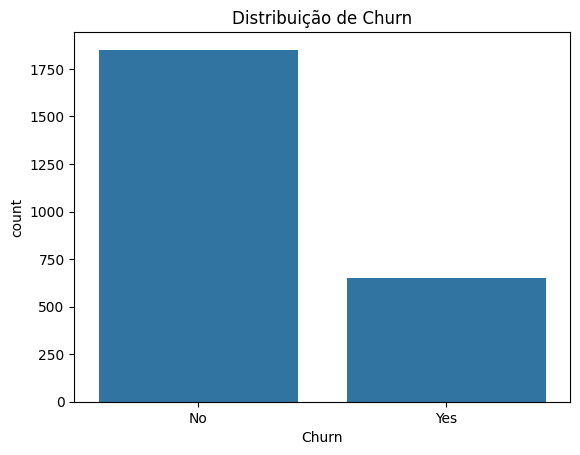

In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Distribuição de Churn")
plt.show()
